Accuracy: 0.70
Precision: 0.71
Recall: 0.76
F1 Score: 0.73
AUC: 0.78


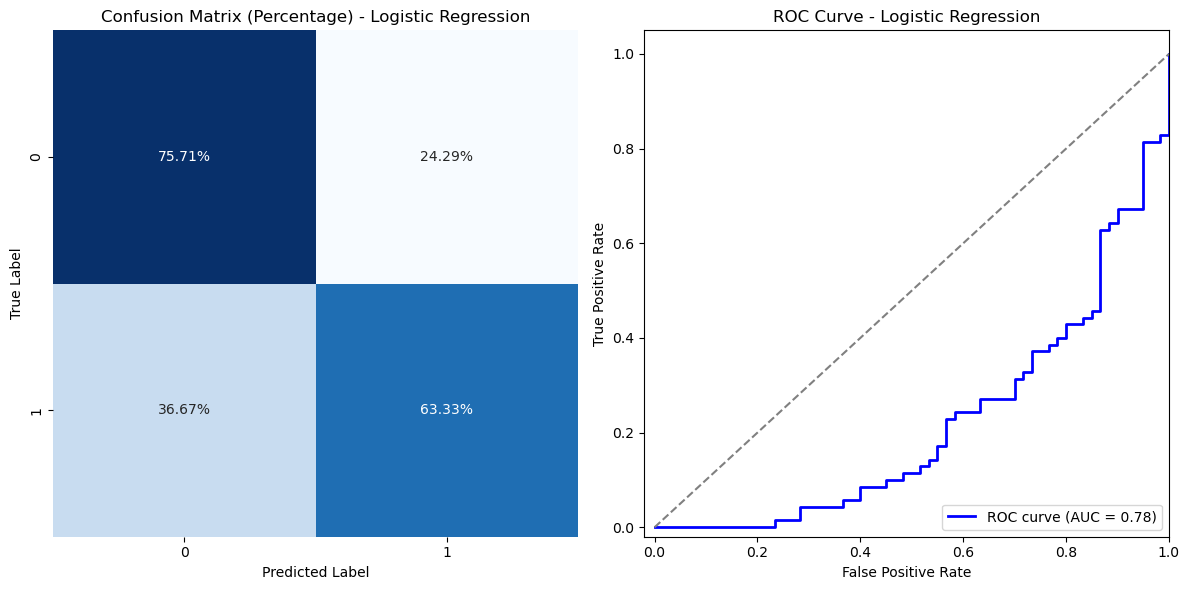

['logistic_model.pkl']

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
file_path = 'por_G3.csv'  
data = pd.read_csv(file_path)

# Select features
features = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
    'guardian', 'traveltime', 'studytime', 'failures', 
    'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic', 
    'famrel', 'freetime', 'goout', 'Dalc', 
    'Walc', 'health', 'absences'
]


data_encoded = data.copy()
label_encoders = {}

for column in features:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

joblib.dump(label_encoders, 'label_encoders.pkl')

X = data_encoded[features]
y = data_encoded['G3_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='above avg')
recall = recall_score(y_test, y_pred, pos_label='above avg')
f1 = f1_score(y_test, y_pred, pos_label='above avg')

# AUC score
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {auc_score:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
conf_matrix_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Percentage) - Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='above avg')
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Pkl file
joblib.dump(logistic_model, 'logistic_model.pkl')

